In [7]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster, datasets
from sklearn.preprocessing import MinMaxScaler
import xgboost as xg
from catboost import *
import catboost as cat
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, median_absolute_error



In [8]:
#load training data
training = pd.read_csv("/Users/tugberk/Downloads/training.csv", na_values="no data")


In [9]:
training.drop(columns=["Unnamed: 0", "X1"], inplace=True)

In [10]:
training.dtypes

LOCATION      object
TIME           int64
gdp          float64
tigs         float64
neet         float64
unemp        float64
inflation    float64
dtype: object

In [11]:
test = pd.read_csv("/Users/tugberk/Downloads/test.csv")
test.drop(columns=["Unnamed: 0", "X1"], inplace=True)


In [12]:
test

,LOCATION,TIME,gdp,tigs,unemp,inflation
0,AUS,2019,1.754868,-1.171590,5.162772,1.6
1,AUS,2020,-4.988130,-9.467642,7.442501,1.4
2,AUT,2019,1.510754,2.667429,4.486311,1.5
3,AUT,2020,-6.206705,-9.038143,5.752664,0.4
4,BEL,2019,1.404457,1.034486,5.357899,1.2
...,...,...,...,...,...,...
65,SWE,2020,-6.682566,-5.937576,9.959999,0.5
66,TUR,2019,0.877433,-3.568463,13.694900,15.2
67,TUR,2020,-4.801712,-9.445304,15.619381,12.0
68,USA,2019,2.333339,0.978944,3.662356,1.8


In [13]:
# Separating the predictor and the target
X = training.drop(columns="neet")
y = training["neet"]

In [14]:
# Splitting the dataset into training and testing parts. Random state 42 is for reproducibility.
xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=training["TIME"],random_state=42,  test_size=0.20 )

In [15]:
# informing catboost that the column 0 (LOCATION) should be treated as categorical variable
categories = [0]

In [16]:
# calling catboos regressor
cregressor = cat.CatBoostRegressor(cat_features=categories)

In [18]:
# Ititiating the fitting process with default hyperparameters.
fit = cregressor.fit(xtrain, ytrain,cat_features=categories, silent=True)

In [19]:
# Saving the training predictions into a variable.
c_training_predictions = fit.predict(xtrain)

In [23]:
# Merging predictions vs observed into a different dataframe (training set)
check_train = pd.DataFrame()
check_train["observed"]  = ytrain
check_train["predicted"] = c_training_predictions

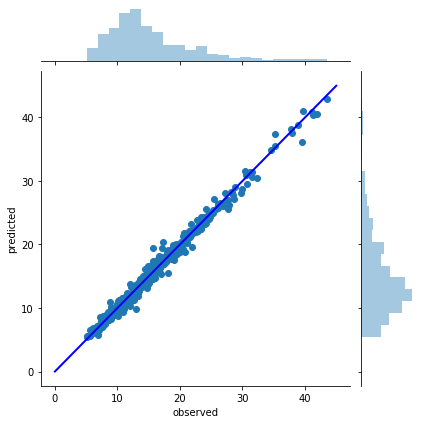

In [21]:
# Visualising the training predictions vs real values
fig_train = sns.jointplot(x="observed", y="predicted",data=check_train)
fig_train.ax_joint.plot([0,45], [0,45], 'b-', linewidth = 2)

fig_train.savefig("training.png")

In [22]:
# test set predictions
c_test_predictions = fit.predict(xtest)


In [24]:
# Merging predictions vs observed into a different dataframe (test set)
check_test = pd.DataFrame()
check_test["observed"]  = ytest
check_test["predicted"] = c_test_predictions

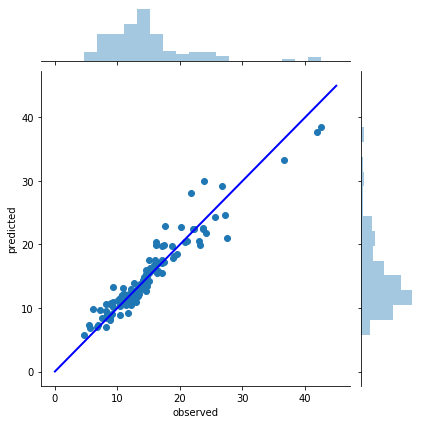

In [25]:
# Visualising the training predictions vs real values (test set)
fig_test = sns.jointplot(x="observed", y="predicted", data=check_test)
fig_test.ax_joint.plot([0,45], [0,45], 'b-', linewidth = 2)
fig_test.savefig("test")

In [26]:
# Training vs test set comparisons concerning different goodness of fit tests
print("mse for training is:",mean_squared_error(ytrain, c_training_predictions))
print("mse for test is:",    mean_squared_error(ytest, c_test_predictions))
print("r2 for training is:", r2_score(ytrain, c_training_predictions))
print("r2 for test is:", r2_score(ytest, c_test_predictions))
print("mae for training is:", median_absolute_error(ytrain, c_training_predictions))
print("mae for test is:", median_absolute_error(ytest, c_test_predictions))
print("msle for training is:", mean_squared_log_error(ytrain, c_training_predictions))
print("msle for test is:", mean_squared_log_error(ytest, c_test_predictions))

mse for training is: 0.5284799520979059
mse for test is: 3.2324659384827372
r2 for training is: 0.988196578894564
r2 for test is: 0.916430619829086
mae for training is: 0.39411046074582323
mae for test is: 0.8716680832404675
msle for training is: 0.0022940548754641784
msle for test is: 0.011976161317056177


In [27]:
# Predicting 2019 and 2020 values
predictions = cregressor.predict(test)

In [28]:
#predicted values
predictions

array([10.8452149 , 12.48102311,  9.9388844 , 10.03057439, 12.50066246,
       12.43735521, 11.48496354, 14.48453863,  9.81556174,  9.99471328,
       18.76929526, 21.32715818,  9.8767531 , 11.03276185,  9.46778171,
        9.52052132,  8.560378  ,  9.96274697, 19.93700223, 21.38022857,
       11.17825814, 15.11733135, 10.06711722, 11.89858001, 14.76982636,
       17.01021941, 13.60069662, 16.29134893, 22.28727575, 23.67458189,
       14.9790723 , 16.47151167, 10.91492702, 15.57139593,  8.15868648,
       10.46206417, 13.6453509 , 15.527947  , 21.77111865, 21.77021148,
        9.34231296,  8.9829643 , 11.06637244, 13.3591001 ,  8.90692044,
       10.03538076, 12.42225815, 14.54708943, 21.39267644, 19.39340161,
        6.25479285,  8.04015297,  9.09064493,  9.26023907, 11.28091662,
       13.24744018, 13.36646332, 15.43643937, 11.42911995, 16.1747391 ,
       14.45801893, 14.87175001, 10.44124335, 10.60688085,  8.92663149,
       12.72822034, 29.1047393 , 30.37710389, 12.00374117, 17.20

In [29]:
# adding the predicted values to main test dataset
test["neet"] = predictions

In [30]:
# appending test and training datasets which are updated with 2019 and 2020 predictions into one final dataframe
final = training.append(test).sort_values(by=["LOCATION", "TIME"])

In [51]:
# Germany
final[final["LOCATION"]=="DEU"]

,LOCATION,TIME,gdp,tigs,neet,unemp,inflation
123,DEU,1997,1.860327,9.297961,14.311419,9.637372,1.5
124,DEU,1999,1.747348,8.613964,13.219603,8.563067,0.7
125,DEU,2000,3.143885,11.280234,13.309676,7.946569,1.4
126,DEU,2001,1.810428,1.150950,13.089443,7.798964,1.9
127,DEU,2002,-0.166167,-2.568921,12.621109,8.608976,1.3
128,DEU,2003,-0.718352,5.601118,12.862095,9.694580,1.1
129,DEU,2004,0.708835,6.911593,13.454344,10.330718,1.8
130,DEU,2005,0.902351,6.210113,14.703324,11.020578,1.9
131,DEU,2006,3.999888,11.529511,13.602721,10.042039,1.8
132,DEU,2007,3.080727,6.495229,12.578499,8.577402,2.3


In [137]:
#final["LOCATION"] = enc.inverse_transform(final["LOCATION"])

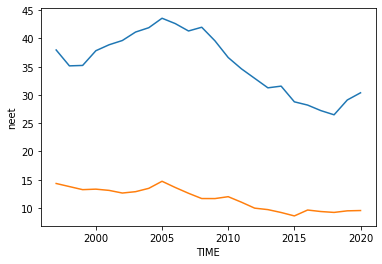

In [35]:
# Comparing Germany's and Turkey's NEET timelines 
sns.lineplot(x="TIME", y="neet", data=final[final["LOCATION"]=="TUR"])
sns.lineplot(x="TIME", y="neet", data=final[final["LOCATION"]=="DEU"])


In [36]:
final[final["TIME"]==2020].sort_values(by="neet")

,LOCATION,TIME,gdp,tigs,neet,unemp,inflation
51,NLD,2020,-8.015985,-12.578830,8.040153,5.921286,0.5
41,JPN,2020,-6.049861,-8.385415,8.982964,3.208474,0.2
53,NOR,2020,-5.988682,-10.963422,9.260239,5.872092,2.4
15,DEU,2020,-6.602261,-9.573666,9.520521,4.511465,0.3
17,DNK,2020,-5.784847,-6.712417,9.962747,6.641229,0.7
9,CHE,2020,-7.707232,-6.662819,9.994713,5.699332,-0.4
3,AUT,2020,-6.206705,-9.038143,10.030574,5.752664,0.4
45,LUX,2020,-6.497532,-8.492095,10.035381,7.110288,0.7
35,ISL,2020,-9.915573,-17.905269,10.462064,7.377851,2.3
63,SVN,2020,-7.817649,-14.879771,10.606881,6.409857,0.4


In [38]:
# Importing package for Shapley Values
import shap as sh

In [39]:
# calling shap tree explainer and calculating shapley values
explainer = sh.TreeExplainer(cregressor)
shap_values = explainer.shap_values(Pool(xtest, ytest, cat_features=categories))



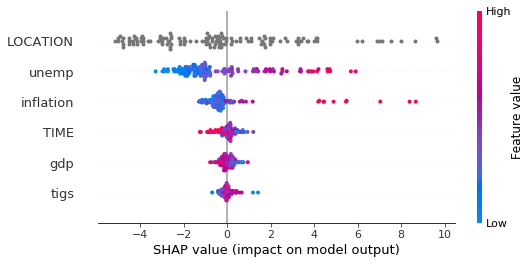

In [41]:
# summary plot
sh.summary_plot(shap_values, xtest, show=False)
import matplotlib.pyplot as plt
plt.savefig("summary_plot.png")

In [43]:
# Column a is 2015 NEET values and column b is 2020 
a = final[["LOCATION", "neet"]][final["TIME"]==2015]
b = final[["LOCATION", "neet"]][final["TIME"]==2020]

In [44]:
# combining those 2 columns into one dataframe and adding their differences as separate column
c = pd.merge(a, b, on='LOCATION')
c["diff"] = c["neet_x"]-c["neet_y"]

In [47]:
# The countries which are falling back from their 2015 NEET levels.
c[c["diff"]>0].sort_values(by="diff").reset_index()

,index,LOCATION,neet_x,neet_y,diff
0,25,NZL,13.294979,13.247440,0.047539
1,11,FRA,17.200922,17.010219,0.190703
2,26,POL,15.646258,15.436439,0.209819
3,23,NLD,8.267985,8.040153,0.227832
4,19,LTU,13.743647,13.359100,0.384547
5,1,AUT,10.438811,10.030574,0.408237
6,7,DNK,10.506375,9.962747,0.543628
7,15,IRL,16.197556,15.571396,0.626160
8,5,CZE,12.232547,11.032762,1.199785
9,2,BEL,13.808910,12.437355,1.371555


In [48]:
# The countries which are improving from their 2015 NEET levels.
c[c["diff"]<=0].sort_values(by="diff").reset_index()

,index,LOCATION,neet_x,neet_y,diff
0,16,ISL,6.151902,10.462064,-4.310162
1,30,SWE,9.077164,12.728220,-3.651057
2,4,CHL,17.971138,21.327158,-3.356020
3,32,USA,14.380193,17.205552,-2.825359
4,12,GBR,13.741446,16.291349,-2.549903
5,9,EST,12.848400,15.117331,-2.268931
6,20,LUX,8.425355,10.035381,-1.610026
7,31,TUR,28.777969,30.377104,-1.599135
8,21,LVA,12.961889,14.547089,-1.585200
9,17,ISR,14.077371,15.527947,-1.450576


From this point on this is for preparing the data for Map visualisation which will be held at datawrapper.de

In [198]:
final.to_csv("final_all.csv")

In [205]:
final_cc = pd.read_csv("/Users/tugberk/Downloads/final_country.csv", usecols=["LOCATION",	"TIME",	"gdp",	"tigs",	"neet",	"unemp",	"inflation"])

In [208]:
final_cc[final_cc["TIME"]==2020].sort_values(by="neet")

,LOCATION,TIME,gdp,tigs,neet,unemp,inflation
525,Netherlands,2020,-8.015985,-12.578830,8.040153,5.921286,0.5
427,Japan,2020,-6.049861,-8.385415,8.982964,3.208474,0.2
549,Norway,2020,-5.988682,-10.963422,9.260239,5.872092,2.4
159,Germany,2020,-6.602261,-9.573666,9.520521,4.511465,0.3
183,Denmark,2020,-5.784847,-6.712417,9.962747,6.641229,0.7
105,Switzerland,2020,-7.707232,-6.662819,9.994713,5.699332,-0.4
40,Austria,2020,-6.206705,-9.038143,10.030574,5.752664,0.4
459,Luxembourg,2020,-6.497532,-8.492095,10.035381,7.110288,0.7
374,Iceland,2020,-9.915573,-17.905269,10.462064,7.377851,2.3
655,Slovenia,2020,-7.817649,-14.879771,10.606881,6.409857,0.4


In [287]:
a_c = final_cc[["LOCATION", "neet"]][final_cc["TIME"]==2018]
b_c = final_cc[["LOCATION", "neet"]][final_cc["TIME"]==2019]

In [288]:
c_c = pd.merge(a_c, b_c, on='LOCATION')

In [289]:
c_c["diff"] = c_c["neet_x"]-c_c["neet_y"]

In [283]:
cc = c_c.sort_values(by="diff").reset_index()

In [218]:
neet_diff = cc[["LOCATION", "diff"]]

In [220]:
neet_diff.to_csv("/Users/tugberk/Downloads/neet_diff.csv")

In [284]:
c_c[c_c["diff"].between(-1,1)].sort_values(by="diff")

,LOCATION,neet_x,neet_y,diff
30,Slovakia,14.458019,14.871750,-0.413731
4,Switzerland,9.815562,9.994713,-0.179152
26,Norway,9.090645,9.260239,-0.169594
31,Slovenia,10.441243,10.606881,-0.165638
1,Austria,9.938884,10.030574,-0.091690
7,Germany,9.467782,9.520521,-0.052740
19,Italy,21.771119,21.770211,0.000907
2,Belgium,12.500662,12.437355,0.063307
20,Japan,9.342313,8.982964,0.359349


In [268]:
c_c[c_c["diff"]<0].sort_values(by="diff")

,LOCATION,neet_x,neet_y,diff
16,Iceland,6.151902,10.462064,-4.310162
30,Sweden,9.077164,12.728220,-3.651057
4,Chile,17.971138,21.327158,-3.356020
32,United States,14.380193,17.205552,-2.825359
12,United Kingdom,13.741446,16.291349,-2.549903
9,Estonia,12.848400,15.117331,-2.268931
20,Luxembourg,8.425355,10.035381,-1.610026
31,Turkey,28.777969,30.377104,-1.599135
21,Latvia,12.961889,14.547089,-1.585200
17,Israel,14.077371,15.527947,-1.450576


In [290]:
c_c.sort_values(by="diff")

,LOCATION,neet_x,neet_y,diff
31,Turkey,26.480194,29.104739,-2.624545
16,Iceland,6.054042,8.158686,-2.104644
4,Switzerland,8.066346,9.815562,-1.749216
14,Hungary,13.499011,14.979072,-1.480061
21,Latvia,11.176793,12.422258,-1.245465
25,New Zealand,10.169330,11.280917,-1.111587
12,United Kingdom,12.601758,13.600697,-0.998939
8,Spain,19.058907,19.937002,-0.878095
13,Greece,21.454674,22.287276,-0.832602
29,Slovenia,9.673286,10.441243,-0.767957


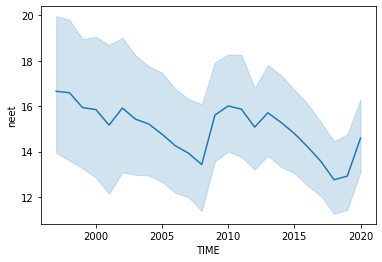

In [279]:
fig = sns.lineplot(x="TIME", y="neet", data=final_cc)
import matplotlib.pyplot as plt
fig.figure.savefig("oecd_avg.png")

In [253]:
print("Colormap Spectral_2 is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r")


Colormap Spectral_2 is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_ste

In [294]:
final_cc["neet"][final_cc["TIME"]==2020].mean()

14.591807626520056

In [295]:
final_cc["neet"][final_cc["TIME"]==2019].mean()

12.915876545755552

In [297]:
final_cc.groupby(["TIME"])["neet"].mean()

TIME
1997    16.651674
1998    16.589912
1999    15.932840
2000    15.847583
2001    15.162435
2002    15.915412
2003    15.424398
2004    15.210372
2005    14.761510
2006    14.254543
2007    13.925194
2008    13.426945
2009    15.606254
2010    16.006778
2011    15.864496
2012    15.076190
2013    15.705522
2014    15.278709
2015    14.794252
2016    14.206700
2017    13.569100
2018    12.755250
2019    12.915877
2020    14.591808
Name: neet, dtype: float64